In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install rasterio geopandas shapely matplotlib Pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 82.3 MB/s eta 0:00:00


tiling raster

In [ ]:
import os
import rasterio
import numpy as np
from PIL import Image

def tile_raster(tif_path, output_folder, tile_size=256, prefix='tile'):
    os.makedirs(output_folder, exist_ok=True)
    tile_paths = []

    with rasterio.open(tif_path) as src:
        data = src.read()  # shape: (bands, H, W)
        height, width = data.shape[1], data.shape[2]
        profile = src.profile
        transform = src.transform

        for i in range(0, height, tile_size):
            for j in range(0, width, tile_size):
                if i + tile_size <= height and j + tile_size <= width:
                    tile = data[:, i:i+tile_size, j:j+tile_size]
                    tile_filename = f"{prefix}_{i}_{j}.tif"
                    tile_path = os.path.join(output_folder, tile_filename)

                    tile_profile = profile.copy()
                    tile_profile.update({
                        "height": tile_size,
                        "width": tile_size,
                        "transform": rasterio.windows.transform(
                            rasterio.windows.Window(j, i, tile_size, tile_size),
                            transform)
                    })

                    with rasterio.open(tile_path, 'w', **tile_profile) as dst:
                        dst.write(tile)

                    tile_paths.append(tile_path)
    return tile_paths


tiling ortho

In [ ]:
# Tile Orthoimage
tile_raster(
    tif_path='/content/drive/MyDrive/Project/OrtoGasca.tif',  # 🟢 YOUR ORTHOIMAGE PATH
    output_folder='/content/drive/MyDrive/lagasca/tiles/ortho',
    tile_size=256,
    prefix='ortho'
)

# Tile DSM
tile_raster(
    tif_path='/content/drive/MyDrive/Project/DEMGasca.tif',  # 🟢 YOUR DSM PATH
    output_folder='/content/drive/MyDrive/lagasca/tiles/dsm',
    tile_size=256,
    prefix='dsm'
)


['/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_0.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_256.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_512.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_768.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_1024.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_1280.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_1536.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_1792.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_2048.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_2304.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_2560.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_2816.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_3072.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_3328.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_3584.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm_0_3840.tif',
 '/content/drive/MyDrive/lagasca/tiles/dsm/dsm

rasterize shapefile

In [ ]:
import geopandas as gpd
from rasterio.features import rasterize

def rasterize_shapefile(shapefile_path, reference_tif_path, out_path):
    with rasterio.open(reference_tif_path) as src:
        transform = src.transform
        out_shape = (src.height, src.width)
        crs = src.crs

    gdf = gpd.read_file(shapefile_path).to_crs(crs)

    mask = rasterize(
        [(geom, 1) for geom in gdf.geometry],
        out_shape=out_shape,
        transform=transform,
        fill=0,
        dtype='uint8'
    )

    with rasterio.open(reference_tif_path) as src:
        profile = src.profile.copy()
        profile.update(dtype=rasterio.uint8, count=1)

        with rasterio.open(out_path, 'w', **profile) as dst:
            dst.write(mask, 1)


In [ ]:
rasterize_shapefile(
    shapefile_path='/content/drive/MyDrive/Project/Woodland.shp',  # 🟢 YOUR SHAPEFILE
    reference_tif_path='/content/drive/MyDrive/Project/OrtoGasca.tif',  # 🟢 REFERENCE = ORTHOIMAGE
    out_path='/content/drive/MyDrive/lagasca/woodland_mask.tif'  # 🟢 OUTPUT PATH
)


In [ ]:
tile_raster(
    tif_path='/content/drive/MyDrive/lagasca/woodland_mask.tif',  # 🟢 RASTERIZED MASK PATH
    output_folder='/content/drive/MyDrive/lagasca/tiles/masks',
    tile_size=256,
    prefix='mask'
)


['/content/drive/MyDrive/lagasca/tiles/masks/mask_0_0.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_256.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_512.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_768.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_1024.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_1280.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_1536.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_1792.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_2048.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_2304.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_2560.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_2816.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_3072.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_3328.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_3584.tif',
 '/content/drive/MyDrive/lagasca/tiles/masks/mask_0_3840.tif'

In [ ]:
!pip install segmentation-models-pytorch --quiet
!pip install albumentations==1.3.0 --quiet
!pip install --upgrade Pillow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 5.8 MB/s eta 0:00:00


alignment check

In [ ]:
import rasterio

# Update paths to the new aligned mask
ortho_path = "/content/drive/MyDrive/Project/OrtoGasca_aligned.tif"
dsm_path = "/content/drive/MyDrive/Project/DEMGasca.tif"
mask_path = "/content/drive/MyDrive/Project/Woodland_mask_aligned.tif"

with rasterio.open(ortho_path) as ortho, \
     rasterio.open(dsm_path) as dsm, \
     rasterio.open(mask_path) as mask:

    errors = []

    if not (ortho.crs == dsm.crs == mask.crs):
        errors.append("CRS mismatch")

    if not (ortho.transform == dsm.transform == mask.transform):
        errors.append("Transform mismatch")

    if not (ortho.width == dsm.width == mask.width and ortho.height == dsm.height == mask.height):
        errors.append("Shape mismatch")

    if errors:
        print("⚠️ Alignment issues found:")
        for e in errors:
            print(f"- {e}")
    else:
        print("✅ All rasters are perfectly aligned! You are good to proceed 🎯")


✅ All rasters are perfectly aligned! You are good to proceed 🎯


shapefile match with raster

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np

# File paths
shapefile_path = "/content/drive/MyDrive/Project/Woodland.shp"
reference_raster_path = "/content/drive/MyDrive/Project/DEMGasca.tif"
output_mask_path = "/content/drive/MyDrive/Project/Woodland_mask_aligned.tif"

# Load shapefile
woodland_gdf = gpd.read_file(shapefile_path)

# Open reference raster
with rasterio.open(reference_raster_path) as ref_raster:
    out_meta = ref_raster.meta.copy()
    transform = ref_raster.transform
    out_shape = (ref_raster.height, ref_raster.width)
    crs = ref_raster.crs

    # Reproject woodland shapefile to match raster CRS
    woodland_gdf = woodland_gdf.to_crs(crs)

    # Rasterize
    woodland_mask = rasterize(
        [(geom, 1) for geom in woodland_gdf.geometry],
        out_shape=out_shape,
        transform=transform,
        fill=0,
        dtype='uint8'
    )

# Fix metadata for uint8 mask
out_meta.update({
    "count": 1,
    "dtype": 'uint8',
    "compress": 'lzw'
})
out_meta.pop("nodata", None)  # Remove incompatible nodata

# Write aligned mask
with rasterio.open(output_mask_path, "w", **out_meta) as dest:
    dest.write(woodland_mask, 1)

print("✅ Aligned woodland mask saved successfully.")


✅ Aligned woodland mask saved successfully.


ortho downscaled to dsm

In [ ]:
import rasterio
from rasterio.warp import reproject, Resampling

# Input: original high-res ortho
ortho_in = "/content/drive/MyDrive/Project/OrtoGasca.tif"
dsm_ref = "/content/drive/MyDrive/Project/DEMGasca.tif"
ortho_out = "/content/drive/MyDrive/Project/OrtoGasca_aligned.tif"

# Open DSM (reference)
with rasterio.open(dsm_ref) as ref:
    ref_meta = ref.meta.copy()
    ref_transform = ref.transform
    ref_shape = (ref.height, ref.width)
    ref_crs = ref.crs

# Open Ortho image
with rasterio.open(ortho_in) as src:
    ortho_data = src.read()  # shape: (3, H, W)
    ortho_crs = src.crs

    # Prepare empty output array in target shape
    aligned_ortho = np.empty((src.count, ref_shape[0], ref_shape[1]), dtype=src.dtypes[0])

    for i in range(src.count):
        reproject(
            source=ortho_data[i],
            destination=aligned_ortho[i],
            src_transform=src.transform,
            src_crs=ortho_crs,
            dst_transform=ref_transform,
            dst_crs=ref_crs,
            dst_shape=ref_shape,
            resampling=Resampling.bilinear
        )

# Save the aligned ortho
# Fix nodata for uint8 images
ref_meta.update({
    "count": ortho_data.shape[0],
    "dtype": ortho_data.dtype,
    "compress": "lzw"
})
ref_meta.pop("nodata", None)  # 🚨 This line is crucial for uint8 RGB

# Save aligned ortho
with rasterio.open(ortho_out, "w", **ref_meta) as dest:
    dest.write(aligned_ortho)

print("✅ Ortho image has been downscaled and aligned.")


✅ Ortho image has been downscaled and aligned.


tiling

In [ ]:
import os
import numpy as np
import rasterio
from tqdm import tqdm

# === CONFIG ===
tile_size = 256
stride = 256  # no overlap
min_mask_pixels = 1  # skip empty mask tiles

# === INPUT FILE PATHS ===
ortho_path = "/content/drive/MyDrive/Project/OrtoGasca_aligned.tif"
dsm_path = "/content/drive/MyDrive/Project/DEMGasca.tif"  # float32 DSM
mask_path = "/content/drive/MyDrive/Project/Woodland_mask_aligned.tif"

# === OUTPUT DIRECTORIES ===
output_root = "/content/drive/MyDrive/Project/Tiles"
input_dir = os.path.join(output_root, "inputs")
mask_dir = os.path.join(output_root, "masks")
os.makedirs(input_dir, exist_ok=True)
os.makedirs(mask_dir, exist_ok=True)

# === READ RASTERS ===
with rasterio.open(ortho_path) as ortho_src, \
     rasterio.open(dsm_path) as dsm_src, \
     rasterio.open(mask_path) as mask_src:

    rgb = ortho_src.read([1, 2, 3]).astype(np.float32)  # Only R, G, B
    dsm = dsm_src.read(1).astype(np.float32)            # shape: (H, W)
    mask = mask_src.read(1).astype(np.uint8)            # shape: (H, W)

    # Replace DSM nodata (-32767) with 0
    dsm = np.where(dsm == -32767.0, 0, dsm)

    # Shape check
    assert rgb.shape[1:] == dsm.shape == mask.shape, "Shape mismatch among inputs!"

    H, W = dsm.shape
    tile_id = 0

    print("🔄 Tiling started...")
    for i in tqdm(range(0, H - tile_size + 1, stride)):
        for j in range(0, W - tile_size + 1, stride):
            rgb_tile = rgb[:, i:i+tile_size, j:j+tile_size]
            dsm_tile = dsm[i:i+tile_size, j:j+tile_size]
            mask_tile = mask[i:i+tile_size, j:j+tile_size]

            # Skip tiles without vegetation
            if np.sum(mask_tile) < min_mask_pixels:
                continue

            # Debug first tile only
            if tile_id == 0:
                print("Tiling DSM debug:")
                print(" - min:", dsm_tile.min())
                print(" - max:", dsm_tile.max())
                print(" - dtype:", dsm_tile.dtype)

            # Combine input tile: (4, H, W)
            input_tile = np.concatenate([rgb_tile, dsm_tile[np.newaxis, ...]], axis=0)
            mask_tile = mask_tile[np.newaxis, ...]  # (1, H, W)

            # Save .npy files
            input_path = os.path.join(input_dir, f"tile_{tile_id:05d}.npy")
            mask_path_out = os.path.join(mask_dir, f"tile_{tile_id:05d}.npy")
            np.save(input_path, input_tile)
            np.save(mask_path_out, mask_tile)

            tile_id += 1

print(f"✅ Done! {tile_id} vegetation tiles saved to:")
print(f"📂 {input_dir} (inputs)")
print(f"📂 {mask_dir} (masks)")


🔄 Tiling started...


  0%|          | 0/19 [00:00<?, ?it/s]

Tiling DSM debug:
 - min: 0.0
 - max: 2855.068
 - dtype: float32


100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

✅ Done! 306 vegetation tiles saved to:
📂 /content/drive/MyDrive/Project/Tiles/inputs (inputs)
📂 /content/drive/MyDrive/Project/Tiles/masks (masks)


In [ ]:
tile = np.load("/content/drive/MyDrive/Project/Tiles/inputs/tile_00000.npy")
print("DSM max:", tile[3].max(), "dtype:", tile[3].dtype)


DSM max: 2855.068 dtype: float32


main directory - visualizing tiles

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# === Define absolute input/output directories ===
input_dir = "/content/drive/MyDrive/Project/Tiles/inputs"
mask_dir = "/content/drive/MyDrive/Project/Tiles/masks"

# === Collect tile IDs ===
tile_ids = sorted([
    int(f.split("_")[1].split(".")[0])
    for f in os.listdir(input_dir)
    if f.endswith(".npy")
])

# === Randomly select 5 tiles ===
samples = random.sample(tile_ids, 5)

# === Visualize each tile ===
for tile_id in samples:
    input_path = os.path.join(input_dir, f"tile_{tile_id:05d}.npy")
    mask_path = os.path.join(mask_dir, f"tile_{tile_id:05d}.npy")

    input_tile = np.load(input_path)
    mask_tile = np.load(mask_path)[0]

    rgb = input_tile[:3].transpose(1, 2, 0)
    dsm = input_tile[3]

    fig, axs = plt.subplots(1, 3, figsize=(15, 4))

    axs[0].imshow(rgb.astype(np.uint8))
    axs[0].set_title(f"RGB (Tile {tile_id})")
    axs[0].axis("off")

    dsm_plot = axs[1].imshow(dsm, cmap="terrain")
    axs[1].set_title("DSM (elevation)")
    axs[1].axis("off")
    fig.colorbar(dsm_plot, ax=axs[1], shrink=0.7)

    axs[2].imshow(rgb.astype(np.uint8))
    axs[2].imshow(mask_tile, cmap="Reds", alpha=0.5)
    axs[2].set_title("Vegetation Mask")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

final new lightweight u-net model

In [30]:
import os, random, math, time, numpy as np, torch
from pathlib import Path

# === Your folders (keep these as in your project)
INPUT_TILES_DIR = "/content/drive/MyDrive/Project/Tiles/inputs"   # .npy [4,H,W] RGB+DSM
MASK_TILES_DIR  = "/content/drive/MyDrive/Project/Tiles/masks"    # .npy [1,H,W] or [H,W] {0,1}
PRED_TILES_DIR  = "/content/drive/MyDrive/Project/Tiles/preds"    # will be created

ORIG_DSM_TIF    = "/content/drive/MyDrive/Project/DEMGasca.tif"


OUT_DIR         = "/content/drive/MyDrive/Project/Outputs"
CHECKPOINT_DIR  = "/content/drive/MyDrive/Project/checkpoints"
SAMPLE_PLOTS_DIR= f"{OUT_DIR}/train_previews"

STITCHED_PRED_TIF = f"{OUT_DIR}/Lagasca_pred_mask.tif"
DTM_TIF           = f"{OUT_DIR}/Lagasca_DTM.tif"
DIFF_TIF          = f"{OUT_DIR}/Lagasca_DSM_minus_DTM.tif"
DIFF_PNG          = f"{OUT_DIR}/Lagasca_DSM_minus_DTM.png"

# === Training params
SEED          = 1234
IN_CHANNELS   = 4
OUT_CHANNELS  = 1
TILE_SIZE     = 256
STRIDE        = 256         # set to your tiling stride (256 if non-overlap)
BATCH_SIZE    = 8
LR            = 1e-3
WEIGHT_DECAY  = 1e-4
EPOCHS        = 20
GRAD_CLIP_NORM= 1.0
VAL_SPLIT     = 0.2
VISUAL_EVERY  = 2

# Make dirs
for d in [OUT_DIR, CHECKPOINT_DIR, SAMPLE_PLOTS_DIR, PRED_TILES_DIR]:
    os.makedirs(d, exist_ok=True)

# Repro
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [31]:
import matplotlib.pyplot as plt

def normalize_rgb(rgb):
    # rgb: [3,H,W]
    m = rgb.max()
    if m > 1.0: rgb = rgb / 255.0
    return np.clip(rgb, 0.0, 1.0).astype(np.float32)

def normalize_dsm(dsm):
    # robust per-tile [0,1]
    p2, p98 = np.percentile(dsm, (2, 98))
    if p98 - p2 < 1e-6:
        return np.zeros_like(dsm, dtype=np.float32)
    d = np.clip(dsm, p2, p98)
    d = (d - p2) / (p98 - p2 + 1e-6)
    return d.astype(np.float32)

def show_samples(rgb, dsm, gt, pred=None, title=""):
    cols = 4 if pred is not None else 3
    plt.figure(figsize=(4*cols, 4))
    plt.subplot(1, cols, 1); plt.imshow(np.moveaxis(rgb,0,2)); plt.title("RGB"); plt.axis("off")
    plt.subplot(1, cols, 2); plt.imshow(dsm); plt.title("DSM (scaled)"); plt.axis("off")
    plt.subplot(1, cols, 3); plt.imshow(gt, cmap="gray"); plt.title("GT mask"); plt.axis("off")
    if pred is not None:
        plt.subplot(1, cols, 4); plt.imshow(pred, cmap="gray"); plt.title("Pred mask"); plt.axis("off")
    plt.suptitle(title); plt.tight_layout(); plt.show()

In [32]:
# DATASET (masked)
# -----------------
from natsort import natsorted
from torch.utils.data import Dataset, DataLoader, random_split

class TilesDatasetMasked(Dataset):
    def __init__(self, x_dir, y_dir, augment=False):
        self.x_dir = x_dir; self.y_dir = y_dir
        self.files = natsorted([f for f in os.listdir(x_dir) if f.endswith(".npy")])
        if len(self.files) == 0:
            raise RuntimeError(f"No .npy tiles in {x_dir}")
        self.augment = augment

    def __len__(self): return len(self.files)

    def __getitem__(self, idx):
        name = self.files[idx]
        x = np.load(os.path.join(self.x_dir, name))  # [4,H,W]
        if x.ndim != 3 or x.shape[0] != IN_CHANNELS:
            raise RuntimeError(f"Input {name} expected [4,H,W], got {x.shape}")

        rgb = normalize_rgb(x[:3].astype(np.float32))
        dsm = normalize_dsm(x[3].astype(np.float32))

        # mask path (same basename)
        mpath = os.path.join(self.y_dir, name)
        if not os.path.exists(mpath):
            base = os.path.splitext(name)[0]
            mpath = os.path.join(self.y_dir, f"{base}.npy")
        y = np.load(mpath)
        if y.ndim == 3: y = y[0]
        y = (y > 0).astype(np.float32)

        # valid pixels: non-empty RGB + finite DSM
        valid = ((rgb.sum(axis=0) > 0) & np.isfinite(dsm)).astype(np.float32)

        # simple augs
        if self.augment:
            r = random.random()
            if r < 0.25:
                rgb = rgb[:, :, ::-1]; dsm = dsm[:, ::-1]; y = y[:, ::-1]; valid = valid[:, ::-1]
            elif r < 0.5:
                rgb = rgb[:, ::-1, :]; dsm = dsm[::-1, :]; y = y[::-1, :]; valid = valid[::-1, :]
            elif r < 0.75:
                rgb = np.rot90(rgb, 1, axes=(1,2)); dsm = np.rot90(dsm, 1); y = np.rot90(y, 1); valid = np.rot90(valid, 1)

        x_norm = np.concatenate([rgb, dsm[None, ...]], axis=0)  # [4,H,W]
        return (torch.from_numpy(x_norm),
                torch.from_numpy(y[None, ...]),        # [1,H,W]
                torch.from_numpy(valid[None, ...]))     # [1,H,W]

full_ds = TilesDatasetMasked(INPUT_TILES_DIR, MASK_TILES_DIR, augment=False)


In [33]:
# pos_weight (handles class imbalance)
def compute_pos_weight(ds, sample_k=500):
    n = min(len(ds), sample_k)
    idxs = np.linspace(0, len(ds)-1, n).astype(int)
    pos = 0.0; tot = 0.0
    for i in idxs:
        _, y, v = ds[i]
        y = (y * v)[0].numpy()
        pos += y.sum(); tot += y.size
    neg = max(tot - pos, 1.0); pos = max(pos, 1.0)
    import torch
    return torch.tensor(neg/pos, dtype=torch.float32)

pos_weight = compute_pos_weight(full_ds)
print(f"Estimated pos_weight for BCE: {pos_weight.item():.2f}")


Estimated pos_weight for BCE: 13.04


In [34]:
# split
val_len = int(len(full_ds) * VAL_SPLIT)
train_len = len(full_ds) - val_len
train_ds, val_ds = random_split(full_ds, [train_len, val_len],
                                generator=torch.Generator().manual_seed(SEED))
train_ds.dataset.augment = True
val_ds.dataset.augment = False

train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=0, drop_last=True)
val_dl   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=0)



In [35]:
# MODEL
# -----------------
import torch.nn as nn
import torch.nn.functional as F

class ConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )
    def forward(self, x): return self.conv(x)

class UNetLite(nn.Module):
    def __init__(self, in_channels=4, out_channels=1, features=[32,64,128,256]):
        super().__init__()
        self.downs = nn.ModuleList(); self.ups = nn.ModuleList()
        self.pool  = nn.MaxPool2d(2,2)
        ch = in_channels
        for f in features:
            self.downs.append(ConvBlock(ch, f)); ch = f
        self.bottleneck = ConvBlock(features[-1], features[-1]*2)
        for f in reversed(features):
            self.ups.append(nn.ConvTranspose2d(f*2, f, 2, 2))
            self.ups.append(ConvBlock(f*2, f))
        self.final = nn.Conv2d(features[0], out_channels, 1)
    def forward(self, x):
        skips = []
        for d in self.downs:
            x = d(x); skips.append(x); x = self.pool(x)
        x = self.bottleneck(x); skips = skips[::-1]
        for i in range(0, len(self.ups), 2):
            x = self.ups[i](x)
            s = skips[i//2]
            if x.shape[-2:] != s.shape[-2:]:
                diffY = s.size(2) - x.size(2); diffX = s.size(3) - x.size(3)
                x = F.pad(x, [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2])
            x = torch.cat([s, x], dim=1)
            x = self.ups[i+1](x)
        return self.final(x)

model = UNetLite(in_channels=IN_CHANNELS, out_channels=OUT_CHANNELS).to(DEVICE)


In [36]:
# -----------------
# LOSSES (masked) & OPT
# -----------------
bce_raw = nn.BCEWithLogitsLoss(reduction='none', pos_weight=pos_weight.to(DEVICE))

def bce_masked(logits, targets, valid):
    loss = bce_raw(logits, targets) * valid
    return loss.sum() / (valid.sum() + 1e-6)

def dice_loss_masked(logits, targets, valid, eps=1e-6):
    probs = torch.sigmoid(logits)
    probs = probs * valid
    targets = targets * valid
    num = 2 * (probs * targets).sum(dim=(1,2,3)) + eps
    den = (probs + targets).sum(dim=(1,2,3)) + eps
    return 1 - (num / den).mean()

def total_loss_fn(logits, targets, valid):
    return 0.5 * bce_masked(logits, targets, valid) + 0.5 * dice_loss_masked(logits, targets, valid)

optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2, verbose=True)


In [37]:
# METRICS
# -----------------
def iou_score(pred, target, eps=1e-6):
    inter = (pred*target).sum(dim=(1,2,3))
    union = (pred+target - pred*target).sum(dim=(1,2,3)) + eps
    return (inter / union).mean().item()

def dice_score(pred, target, eps=1e-6):
    inter = (pred*target).sum(dim=(1,2,3))
    den = pred.sum(dim=(1,2,3)) + target.sum(dim=(1,2,3)) + eps
    return (2*inter / den).mean().item()


Epoch 001 | train_loss 0.8291 | val_loss 0.8338 | IoU 0.203 | Dice 0.317
  ✅ New best at epoch 1. Saved: /content/drive/MyDrive/Project/checkpoints/unetlite_best_state_dict.pth
Epoch 002 | train_loss 0.8094 | val_loss 0.8880 | IoU 0.147 | Dice 0.235


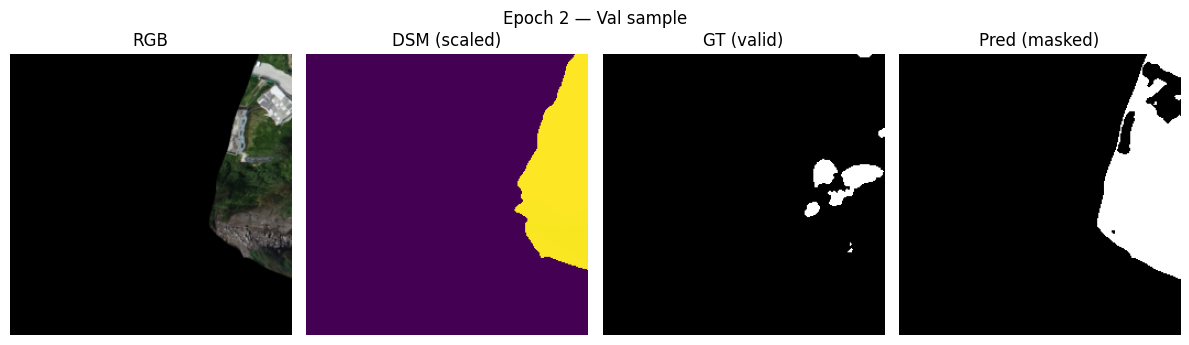

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_002_preview.png
Epoch 003 | train_loss 0.7471 | val_loss 0.7169 | IoU 0.276 | Dice 0.411
  ✅ New best at epoch 3. Saved: /content/drive/MyDrive/Project/checkpoints/unetlite_best_state_dict.pth
Epoch 004 | train_loss 0.6762 | val_loss 0.7053 | IoU 0.277 | Dice 0.411


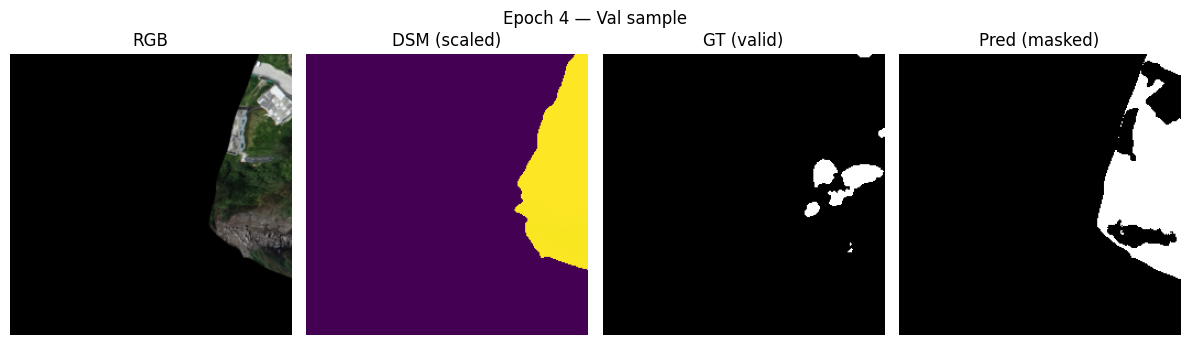

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_004_preview.png
  ✅ New best at epoch 4. Saved: /content/drive/MyDrive/Project/checkpoints/unetlite_best_state_dict.pth
Epoch 005 | train_loss 0.7039 | val_loss 0.7434 | IoU 0.333 | Dice 0.470
Epoch 006 | train_loss 0.7366 | val_loss 0.7493 | IoU 0.355 | Dice 0.497


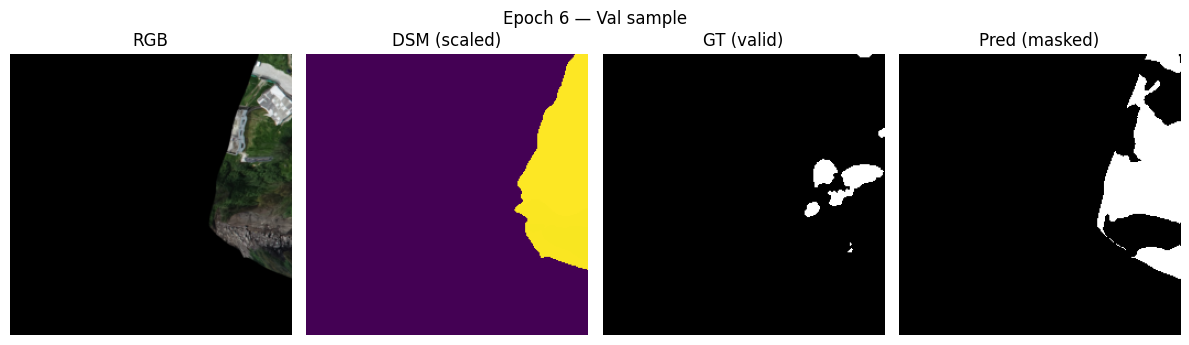

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_006_preview.png
Epoch 007 | train_loss 0.7163 | val_loss 0.6410 | IoU 0.330 | Dice 0.471
  ✅ New best at epoch 7. Saved: /content/drive/MyDrive/Project/checkpoints/unetlite_best_state_dict.pth
Epoch 008 | train_loss 0.6898 | val_loss 0.6626 | IoU 0.309 | Dice 0.448


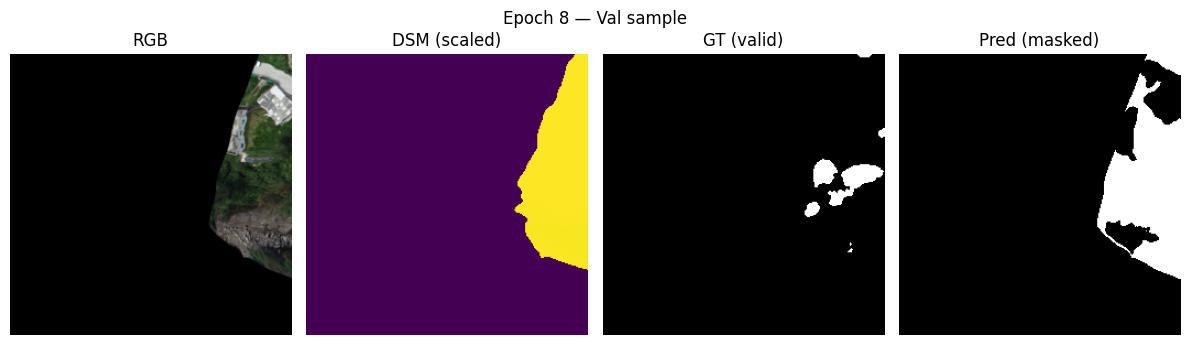

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_008_preview.png
Epoch 009 | train_loss 0.6653 | val_loss 0.7404 | IoU 0.359 | Dice 0.502
Epoch 010 | train_loss 0.6070 | val_loss 0.6059 | IoU 0.281 | Dice 0.418


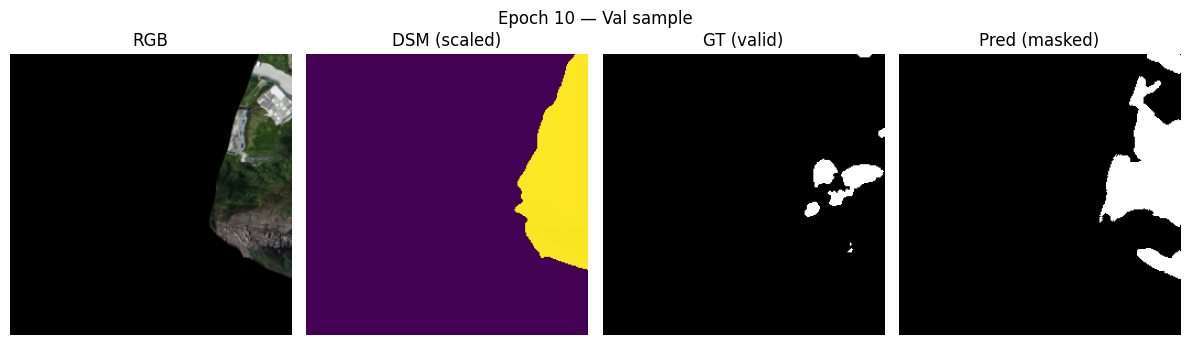

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_010_preview.png
  ✅ New best at epoch 10. Saved: /content/drive/MyDrive/Project/checkpoints/unetlite_best_state_dict.pth
Epoch 011 | train_loss 0.6725 | val_loss 0.7893 | IoU 0.326 | Dice 0.461
Epoch 012 | train_loss 0.6432 | val_loss 0.7906 | IoU 0.329 | Dice 0.467


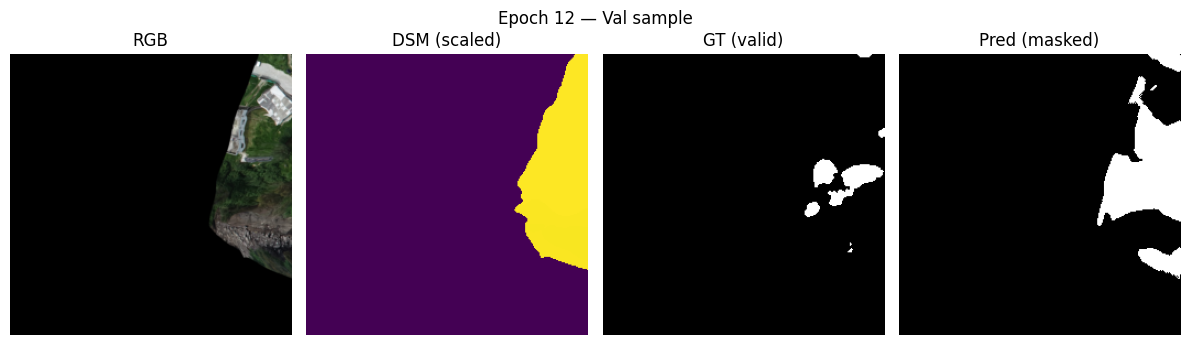

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_012_preview.png
Epoch 013 | train_loss 0.6679 | val_loss 0.5850 | IoU 0.296 | Dice 0.435
  ✅ New best at epoch 13. Saved: /content/drive/MyDrive/Project/checkpoints/unetlite_best_state_dict.pth
Epoch 014 | train_loss 0.7132 | val_loss 0.7068 | IoU 0.248 | Dice 0.378


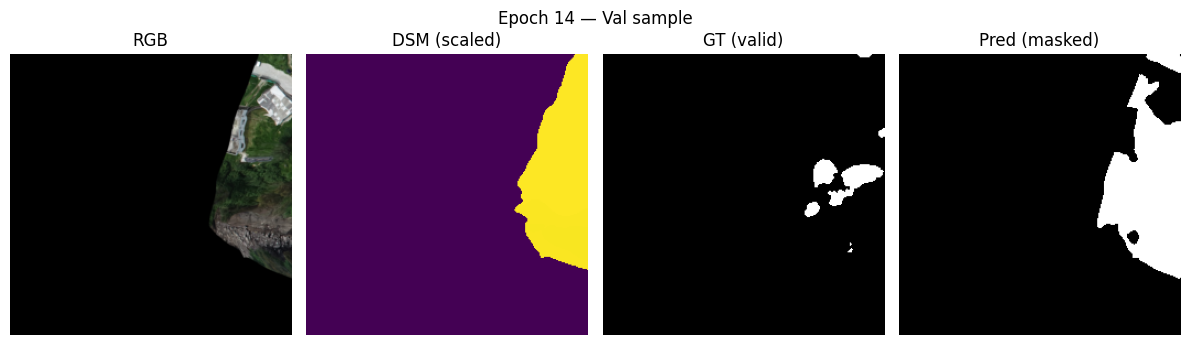

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_014_preview.png
Epoch 015 | train_loss 0.6247 | val_loss 0.6496 | IoU 0.360 | Dice 0.502
Epoch 016 | train_loss 0.6515 | val_loss 0.6638 | IoU 0.338 | Dice 0.481


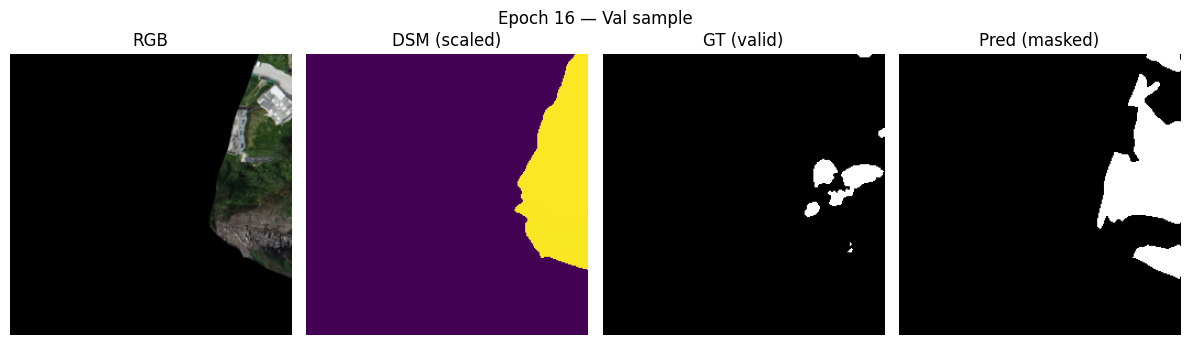

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_016_preview.png
Epoch 017 | train_loss 0.6228 | val_loss 0.5384 | IoU 0.334 | Dice 0.472
  ✅ New best at epoch 17. Saved: /content/drive/MyDrive/Project/checkpoints/unetlite_best_state_dict.pth
Epoch 018 | train_loss 0.6866 | val_loss 0.6645 | IoU 0.399 | Dice 0.543


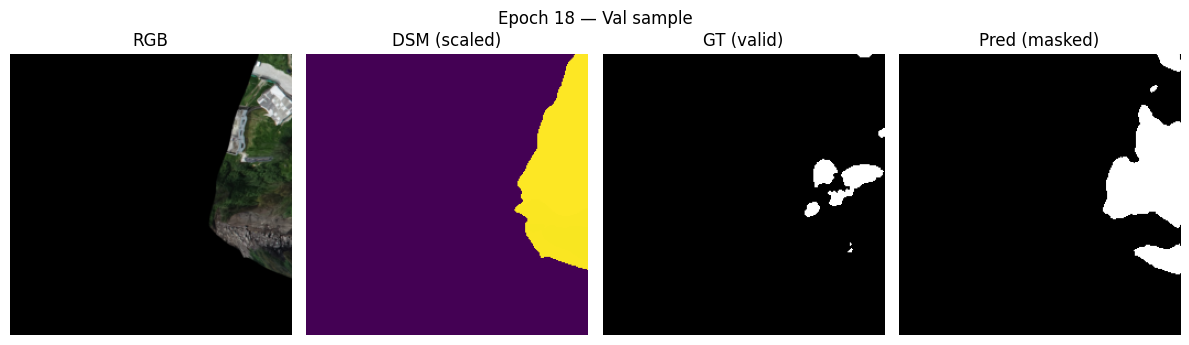

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_018_preview.png
Epoch 019 | train_loss 0.6929 | val_loss 0.6038 | IoU 0.372 | Dice 0.515
Epoch 020 | train_loss 0.5822 | val_loss 0.5559 | IoU 0.400 | Dice 0.543


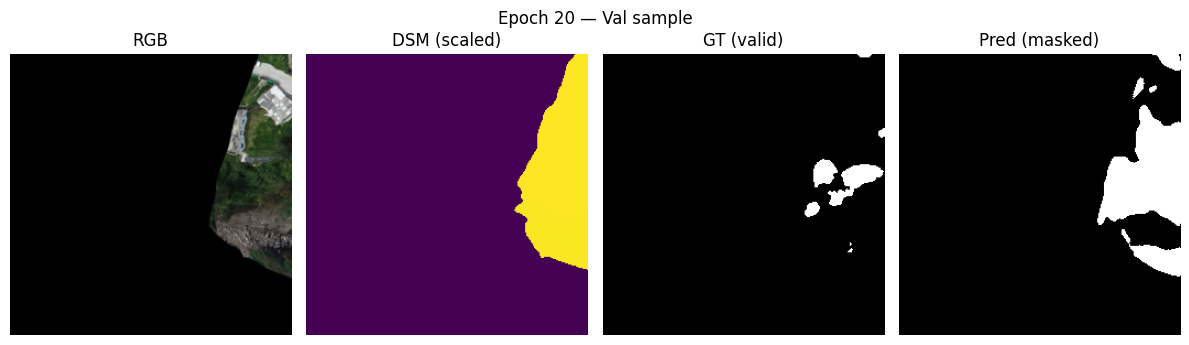

Saved preview: /content/drive/MyDrive/Project/Outputs/train_previews/epoch_020_preview.png
Training done. Best epoch: 17 Best val_loss: 0.5384


In [38]:
# -----------------
# TRAINING + VISUAL CHECKS
# -----------------
MODEL_BEST_PATH = os.path.join(CHECKPOINT_DIR, "unetlite_best_state_dict.pth")

def render_val_samples(epoch, max_batches=1):
    model.eval()
    shown = 0
    with torch.no_grad():
        for xb, yb, vb in val_dl:
            xb, yb, vb = xb.to(DEVICE).float(), yb.to(DEVICE).float(), vb.to(DEVICE).float()
            logits = model(xb)
            probs  = torch.sigmoid(logits)
            preds  = (probs > 0.5).float() * vb
            x0 = xb[0].cpu().numpy(); y0 = (yb[0,0]*vb[0,0]).cpu().numpy()
            p0 = preds[0,0].cpu().numpy()
            rgb = x0[:3]; dsm = x0[3]
            plt.figure(figsize=(12,3.5))
            plt.subplot(1,4,1); plt.imshow(np.moveaxis(rgb,0,2)); plt.title("RGB"); plt.axis("off")
            plt.subplot(1,4,2); plt.imshow(dsm); plt.title("DSM (scaled)"); plt.axis("off")
            plt.subplot(1,4,3); plt.imshow(y0, cmap="gray"); plt.title("GT (valid)"); plt.axis("off")
            plt.subplot(1,4,4); plt.imshow(p0, cmap="gray"); plt.title("Pred (masked)"); plt.axis("off")
            plt.suptitle(f"Epoch {epoch} — Val sample")
            plt.tight_layout()
            out_png = os.path.join(SAMPLE_PLOTS_DIR, f"epoch_{epoch:03d}_preview.png")
            plt.savefig(out_png, dpi=160); plt.show()
            print("Saved preview:", out_png)
            shown += 1
            if shown >= max_batches: break

best_val = float("inf"); best_epoch = -1
patience, waited = 5, 0

for epoch in range(1, EPOCHS+1):
    model.train()
    train_loss = 0.0
    for xb, yb, vb in train_dl:
        xb, yb, vb = xb.to(DEVICE).float(), yb.to(DEVICE).float(), vb.to(DEVICE).float()
        optimizer.zero_grad(set_to_none=True)
        logits = model(xb)
        loss = total_loss_fn(logits, yb, vb)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP_NORM)
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    train_loss /= len(train_dl.dataset)

    # val
    model.eval()
    val_loss = 0.0; iou = 0.0; dsc = 0.0
    with torch.no_grad():
        for xb, yb, vb in val_dl:
            xb, yb, vb = xb.to(DEVICE).float(), yb.to(DEVICE).float(), vb.to(DEVICE).float()
            logits = model(xb)
            vloss  = total_loss_fn(logits, yb, vb)
            val_loss += vloss.item() * xb.size(0)
            preds = (torch.sigmoid(logits) > 0.5).float() * vb
            iou  += iou_score(preds, yb*vb)
            dsc  += dice_score(preds, yb*vb)
    val_loss /= len(val_dl.dataset); iou /= max(1,len(val_dl)); dsc /= max(1,len(val_dl))
    scheduler.step(val_loss)

    print(f"Epoch {epoch:03d} | train_loss {train_loss:.4f} | val_loss {val_loss:.4f} | IoU {iou:.3f} | Dice {dsc:.3f}")

    if epoch % VISUAL_EVERY == 0: render_val_samples(epoch, max_batches=1)

    if val_loss < best_val - 1e-5:
        best_val, best_epoch = val_loss, epoch
        torch.save(model.state_dict(), MODEL_BEST_PATH)
        print(f"  ✅ New best at epoch {epoch}. Saved: {MODEL_BEST_PATH}")
        waited = 0
    else:
        waited += 1
        if waited >= patience:
            print(f"Early stopping at epoch {epoch} (best {best_epoch})")
            break

print("Training done. Best epoch:", best_epoch, "Best val_loss:", round(best_val,4))


In [39]:
# -----------------
# THRESHOLD SWEEP (pick a good global base threshold)
# -----------------
def eval_iou_at_thr(model, dataloader, thr=0.5):
    model.eval()
    inter = 0.0; union = 0.0
    with torch.no_grad():
        for xb, yb, vb in dataloader:
            xb, yb, vb = xb.to(DEVICE).float(), yb.to(DEVICE).float(), vb.to(DEVICE).float()
            logits = model(xb)
            probs  = torch.sigmoid(logits)
            preds  = (probs > thr).float() * vb
            inter += (preds*(yb*vb)).sum().item()
            union += (preds + (yb*vb) - preds*(yb*vb)).sum().item()
    return inter / (union + 1e-6)

model.load_state_dict(torch.load(MODEL_BEST_PATH, map_location=DEVICE))
grid = np.linspace(0.3, 0.7, 9)
BEST_THR, BEST_IOU = 0.5, -1
for t in grid:
    iou_t = eval_iou_at_thr(model, val_dl, thr=float(t))
    print(f"thr={t:.2f} -> IoU={iou_t:.4f}")
    if iou_t > BEST_IOU:
        BEST_IOU, BEST_THR = iou_t, float(t)
print(f"✅ Best threshold on val: {BEST_THR:.2f} (IoU={BEST_IOU:.4f})")


thr=0.30 -> IoU=0.3472
thr=0.35 -> IoU=0.3581
thr=0.40 -> IoU=0.3671
thr=0.45 -> IoU=0.3760
thr=0.50 -> IoU=0.3854
thr=0.55 -> IoU=0.3982
thr=0.60 -> IoU=0.4115
thr=0.65 -> IoU=0.4228
thr=0.70 -> IoU=0.4328
✅ Best threshold on val: 0.70 (IoU=0.4328)


In [40]:
# -----------------
# ADAPTIVE BINARIZER (guards against pure black/white tiles)
# -----------------
from scipy.ndimage import binary_opening, binary_closing

def binarize_with_coverage_guard(probs, low_cov=0.001, high_cov=0.65, base_thr=0.5, valid=None):
    """
    probs: [H,W] float [0,1]
    valid: [H,W] uint8 {0,1}
    """
    if valid is None:
        valid = np.ones_like(probs, dtype=np.uint8)
    p = probs[valid.astype(bool)]
    if p.size == 0:
        return (probs > base_thr).astype(np.uint8)
    pred = (probs > base_thr).astype(np.uint8)
    cov = (pred[valid.astype(bool)]).mean()
    if cov < low_cov:
        thr = np.percentile(p, 95)
        pred = (probs > min(thr, base_thr)).astype(np.uint8)
    elif cov > high_cov:
        thr = np.percentile(p, 5)
        pred = (probs > max(thr, base_thr)).astype(np.uint8)
    pred = binary_opening(pred, iterations=1).astype(np.uint8)
    pred = binary_closing(pred, iterations=1).astype(np.uint8)
    return (pred * valid).astype(np.uint8)


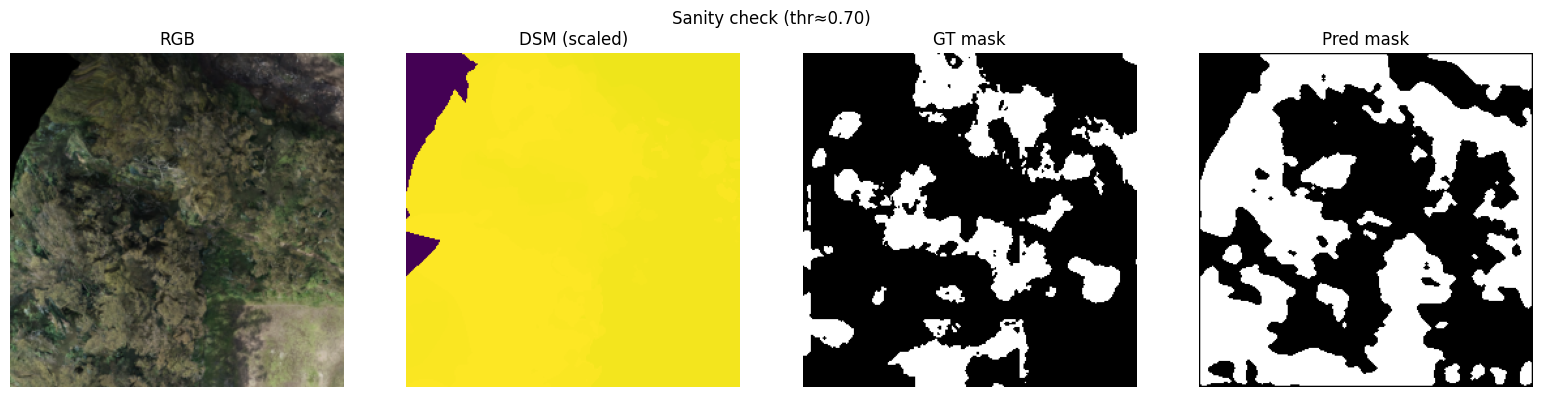

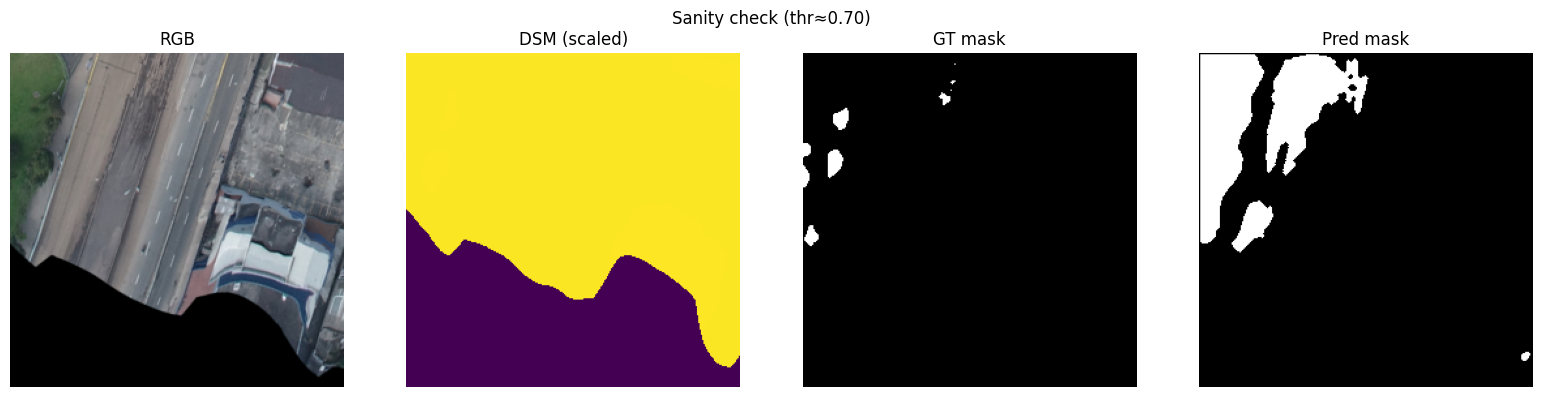

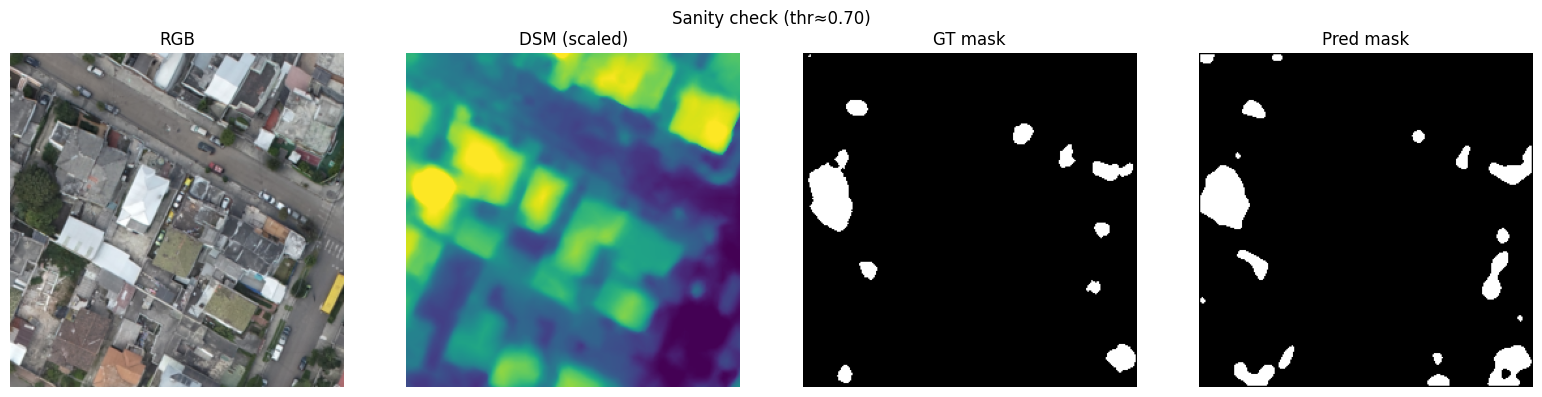

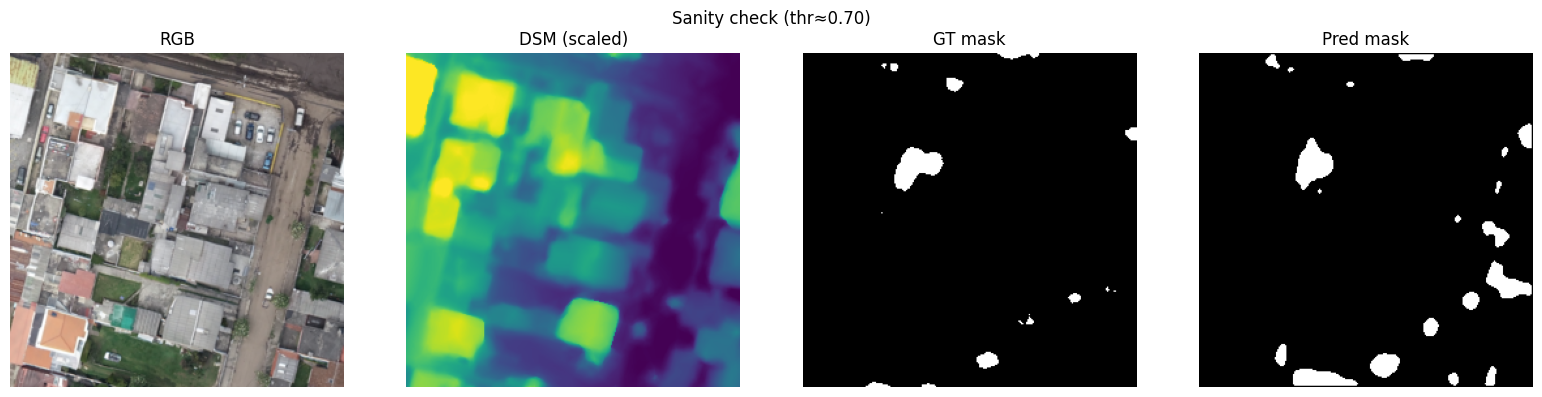

In [41]:
# -----------------
# QUICK SANITY VISUALS ON RANDOM TILES (with adaptive binarizer)
# -----------------
def visualize_random_samples(k=4, base_thr=None):
    if base_thr is None: base_thr = BEST_THR
    idxs = np.random.choice(len(full_ds), size=min(k, len(full_ds)), replace=False)
    model.eval()
    with torch.no_grad():
        for i in idxs:
            x, y, v = full_ds[i]
            xb = x.unsqueeze(0).to(DEVICE).float()
            logits = model(xb)
            probs  = torch.sigmoid(logits)[0,0].cpu().numpy()
            valid  = v[0].numpy()
            pred   = binarize_with_coverage_guard(probs, base_thr=base_thr, valid=valid)
            rgb, dsm, gt = x[:3].numpy(), x[3].numpy(), (y[0]*v[0]).numpy()
            show_samples(rgb, dsm, gt, pred, title=f"Sanity check (thr≈{base_thr:.2f})")

visualize_random_samples(k=4, base_thr=BEST_THR)


In [42]:
# -----------------
# PREDICT ALL TILES → save *_pred.npy (adaptive binarizer)
# -----------------
import torch.nn as nn
sigmoid = nn.Sigmoid()
model.eval()
dl_pred = DataLoader(full_ds, batch_size=8, shuffle=False, num_workers=0)
with torch.no_grad():
    for xb, yb, vb in dl_pred:
        xb = xb.to(DEVICE).float()
        logits = model(xb)
        probs  = sigmoid(logits).squeeze(1).cpu().numpy()  # [B,H,W]
        for i in range(probs.shape[0]):
            name = full_ds.files[len(os.listdir(PRED_TILES_DIR))]  # sequential but safe enough
            # safer: map filenames by index
        # better mapping by re-iterating filenames:
for idx, (x, y, v) in enumerate(full_ds):
    name = full_ds.files[idx]
    xb = x.unsqueeze(0).to(DEVICE).float()
    with torch.no_grad():
        probs = sigmoid(model(xb))[0,0].cpu().numpy()
    valid = v[0].numpy()
    pred  = binarize_with_coverage_guard(probs, base_thr=BEST_THR, valid=valid)
    out_name = os.path.splitext(name)[0] + "_pred.npy"
    np.save(os.path.join(PRED_TILES_DIR, out_name), pred.astype(np.uint8))
print("✅ Prediction tiles saved to:", PRED_TILES_DIR)


✅ Prediction tiles saved to: /content/drive/MyDrive/Project/Tiles/preds


stitching of prediction files

In [45]:
# -----------------
# STITCH PRED TILES → GeoTIFF with DSM geo
# -----------------
import rasterio
from natsort import natsorted

with rasterio.open(ORIG_DSM_TIF) as src:
    width, height = src.width, src.height
    transform = src.transform; crs = src.crs

n_cols = math.ceil((width  - TILE_SIZE) / STRIDE) + 1
n_rows = math.ceil((height - TILE_SIZE) / STRIDE) + 1

canvas = np.zeros((height, width), dtype=np.uint8)
pred_files = natsorted([f for f in os.listdir(PRED_TILES_DIR) if f.endswith("_pred.npy")])

if len(pred_files) != n_rows * n_cols:
    print(f"⚠️ Pred tile count ({len(pred_files)}) != grid ({n_rows}x{n_cols}={n_rows*n_cols}). Best-effort placement.")

idx = 0
for r in range(n_rows):
    for c in range(n_cols):
        if idx >= len(pred_files): break
        tile = np.load(os.path.join(PRED_TILES_DIR, pred_files[idx]))  # (H,W)
        y0 = r * STRIDE; x0 = c * STRIDE
        y1 = min(y0 + TILE_SIZE, height); x1 = min(x0 + TILE_SIZE, width)
        canvas[y0:y1, x0:x1] = tile[:(y1-y0), :(x1-x0)]
        idx += 1

profile = {"driver":"GTiff","height":canvas.shape[0],"width":canvas.shape[1],
           "count":1,"dtype":"uint8","crs":crs,"transform":transform,"compress":"LZW"}
with rasterio.open(STITCHED_PRED_TIF, "w", **profile) as dst:
    dst.write(canvas, 1)
print("✅ Stitched prediction written to:", STITCHED_PRED_TIF)


⚠️ Pred tile count (306) != grid (20x29=580). Best-effort placement.
✅ Stitched prediction written to: /content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask.tif


In [53]:
# --- DTM + DSM−DTM (fixed fillnodata usage) ---
import numpy as np, rasterio
from rasterio.fill import fillnodata

DSM_TIF  = "/content/drive/MyDrive/Project/DEMGasca.tif"
OUT_MASK = "/content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_aligned.tif"
OUT_DTM  = "/content/drive/MyDrive/Project/Outputs/Lagasca_DTM.tif"
OUT_DIFF = "/content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM.tif"

# Read DSM & aligned binary mask (1 = remove)
with rasterio.open(DSM_TIF) as dsm_src:
    dsm = dsm_src.read(1).astype(np.float32)
    meta = dsm_src.meta.copy()

with rasterio.open(OUT_MASK) as msk_src:
    mask = (msk_src.read(1) > 0).astype(np.uint8)

# Create DTM candidate: remove objects as NaN
dtm = dsm.copy()
dtm[mask == 1] = np.nan

# Interpolate NaNs from neighbours
valid = np.isfinite(dtm)  # True where we have real heights
dtm_filled = fillnodata(
    dtm,
    mask=valid,                  # valid data contribute to filling
    max_search_distance=50,
    smoothing_iterations=0
)                               # returns a NumPy array (no .filled method)

# Save DTM
meta.update(dtype="float32", nodata=np.nan, compress="LZW")
with rasterio.open(OUT_DTM, "w", **meta) as dst:
    dst.write(dtm_filled.astype(np.float32), 1)
print("✅ DTM written:", OUT_DTM)

# DSM − DTM difference (QA)
diff = dsm - dtm_filled
with rasterio.open(OUT_DIFF, "w", **meta) as dst:
    dst.write(diff.astype(np.float32), 1)
print("✅ DSM−DTM written:", OUT_DIFF)


✅ DTM written: /content/drive/MyDrive/Project/Outputs/Lagasca_DTM.tif
✅ DSM−DTM written: /content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM.tif


refining DTM and DSM-DTM

In [54]:
import numpy as np, rasterio
from scipy.ndimage import median_filter, binary_opening, binary_closing, label

DSM_TIF   = "/content/drive/MyDrive/Project/DEMGasca.tif"
MASK_IN   = "/content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_aligned.tif"
MASK_OUT  = "/content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_refined.tif"

# --- knobs to try ---
h_min_m        = 2.0        # keep only objects ≥ this much above local ground (try 1.5–3.0 m)
local_win_m    = 9.6        # local ground window ~10 m
min_area_m2    = 40.0       # drop blobs smaller than this (try 30–100 m²)
close_iters    = 1          # fill small holes/gaps (1–2)

# pixel size (EPSG:3857): 0.32 m from your transform
px = 0.32
win_px = int(round(max(3, local_win_m/px))) | 1  # odd kernel size
pix_area = px*px
min_pixels = max(1, int(round(min_area_m2 / pix_area)))

with rasterio.open(DSM_TIF) as dsm_src, rasterio.open(MASK_IN) as msrc:
    dsm  = dsm_src.read(1).astype(np.float32)
    mask = (msrc.read(1) > 0).astype(np.uint8)
    H,W  = dsm_src.height, dsm_src.width
    transform, crs = dsm_src.transform, dsm_src.crs

# 1) local ground via median filter
ground = median_filter(dsm, size=win_px, mode="nearest")
excess = dsm - ground

# 2) keep model positives that are also tall enough
cand = (mask==1) & (excess >= h_min_m)

# 3) light morphology + connected-component area filter
cand = binary_opening(cand, iterations=1)
cand = binary_closing(cand, iterations=close_iters)
L, n = label(cand.astype(np.uint8))
if n > 0:
    counts = np.bincount(L.ravel())
    keep = np.where(counts >= min_pixels)[0]
    keep = keep[keep != 0]  # drop background
    refined = np.isin(L, keep).astype(np.uint8)
else:
    refined = cand.astype(np.uint8)

profile = {"driver":"GTiff","height":H,"width":W,"count":1,"dtype":"uint8",
           "crs":crs,"transform":transform,"compress":"LZW"}
with rasterio.open(MASK_OUT, "w", **profile) as dst:
    dst.write(refined, 1)

print("Refined mask saved:", MASK_OUT, "| coverage:", refined.mean())


Refined mask saved: /content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_refined.tif | coverage: 0.004121866736462595


In [55]:
# --- DTM + DSM−DTM (fixed fillnodata usage) ---
import numpy as np, rasterio
from rasterio.fill import fillnodata

DSM_TIF  = "/content/drive/MyDrive/Project/DEMGasca.tif"
OUT_MASK = "/content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_refined.tif"
OUT_DTM  = "/content/drive/MyDrive/Project/Outputs/Lagasca_DTM.tif"
OUT_DIFF = "/content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM.tif"

# Read DSM & aligned binary mask (1 = remove)
with rasterio.open(DSM_TIF) as dsm_src:
    dsm = dsm_src.read(1).astype(np.float32)
    meta = dsm_src.meta.copy()

with rasterio.open(OUT_MASK) as msk_src:
    mask = (msk_src.read(1) > 0).astype(np.uint8)

# Create DTM candidate: remove objects as NaN
dtm = dsm.copy()
dtm[mask == 1] = np.nan

# Interpolate NaNs from neighbours
valid = np.isfinite(dtm)  # True where we have real heights
dtm_filled = fillnodata(
    dtm,
    mask=valid,                  # valid data contribute to filling
    max_search_distance=50,
    smoothing_iterations=0
)                               # returns a NumPy array (no .filled method)

# Save DTM
meta.update(dtype="float32", nodata=np.nan, compress="LZW")
with rasterio.open(OUT_DTM, "w", **meta) as dst:
    dst.write(dtm_filled.astype(np.float32), 1)
print("✅ DTM written:", OUT_DTM)

# DSM − DTM difference (QA)
diff = dsm - dtm_filled
with rasterio.open(OUT_DIFF, "w", **meta) as dst:
    dst.write(diff.astype(np.float32), 1)
print("✅ DSM−DTM written:", OUT_DIFF)


✅ DTM written: /content/drive/MyDrive/Project/Outputs/Lagasca_DTM.tif
✅ DSM−DTM written: /content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM.tif


choosing the best

In [56]:
import numpy as np, rasterio
from scipy.ndimage import median_filter, binary_opening, binary_closing, label
from rasterio.fill import fillnodata
import os

DSM_TIF  = "/content/drive/MyDrive/Project/DEMGasca.tif"
MASK_IN  = "/content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_aligned.tif"
OUT_DIR  = "/content/drive/MyDrive/Project/Outputs"

presets = {
    # name          h_min_m  min_area_m2  close_iters
    "balanced":     (1.3,    25.0,        2),
    "aggressive":   (0.8,    15.0,        2),
    "conservative": (2.0,    50.0,        1),
}

with rasterio.open(DSM_TIF) as dsm_src, rasterio.open(MASK_IN) as msrc:
    dsm = dsm_src.read(1).astype(np.float32)
    mask = (msrc.read(1) > 0).astype(np.uint8)
    H, W = dsm_src.height, dsm_src.width
    transform, crs = dsm_src.transform, dsm_src.crs
    res_x = abs(transform.a)     # 0.32 m for your data
    res_y = abs(transform.e)
    pix_area = res_x * res_y

def refine_and_build(name, h_min_m, min_area_m2, close_iters):
    win_px = int(round(max(3, 9.6 / res_x))) | 1  # ~10 m window, odd size
    ground = median_filter(dsm, size=win_px, mode="nearest")
    excess = dsm - ground

    cand = (mask == 1) & (excess >= h_min_m)
    cand = binary_opening(cand, iterations=1)
    cand = binary_closing(cand, iterations=close_iters)

    L, n = label(cand.astype(np.uint8))
    if n > 0:
        counts = np.bincount(L.ravel())
        min_pixels = max(1, int(round(min_area_m2 / pix_area)))
        keep = np.where(counts >= min_pixels)[0]
        keep = keep[keep != 0]
        refined = np.isin(L, keep).astype(np.uint8)
    else:
        refined = cand.astype(np.uint8)

    # save refined mask
    mpath = os.path.join(OUT_DIR, f"Lagasca_pred_mask_{name}.tif")
    prof = {"driver":"GTiff","height":H,"width":W,"count":1,"dtype":"uint8",
            "crs":crs,"transform":transform,"compress":"LZW"}
    with rasterio.open(mpath, "w", **prof) as dst:
        dst.write(refined, 1)

    # build DTM
    dtm = dsm.copy()
    dtm[refined == 1] = np.nan
    valid = np.isfinite(dtm)
    dtm_filled = fillnodata(dtm, mask=valid, max_search_distance=150, smoothing_iterations=1)

    dpath = os.path.join(OUT_DIR, f"Lagasca_DTM_{name}.tif")
    diffp = os.path.join(OUT_DIR, f"Lagasca_DSM_minus_DTM_{name}.tif")
    meta = {"driver":"GTiff","height":H,"width":W,"count":1,"dtype":"float32",
            "crs":crs,"transform":transform,"compress":"LZW","nodata":np.nan}

    with rasterio.open(dpath, "w", **meta) as dst: dst.write(dtm_filled.astype(np.float32), 1)
    diff = (dsm - dtm_filled).astype(np.float32)
    with rasterio.open(diffp, "w", **meta) as dst: dst.write(diff, 1)

    # quick stats
    cov = refined.mean()
    p95 = float(np.percentile(diff, 95))
    vol = float(diff[diff>0].sum() * pix_area)  # “removed volume” proxy
    print(f"[{name}] mask coverage={cov:.004f} | diff p95={p95:.2f} m | removed-volume≈{vol:.1f} m^3")
    print("  Mask:", mpath)
    print("  DTM :", dpath)
    print("  Diff:", diffp)

for name, (h, a, c) in presets.items():
    refine_and_build(name, h, a, c)


[balanced] mask coverage=0.0132 | diff p95=0.00 m | removed-volume≈42121708.0 m^3
  Mask: /content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_balanced.tif
  DTM : /content/drive/MyDrive/Project/Outputs/Lagasca_DTM_balanced.tif
  Diff: /content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM_balanced.tif
[aggressive] mask coverage=0.0223 | diff p95=0.00 m | removed-volume≈66008412.0 m^3
  Mask: /content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_aggressive.tif
  DTM : /content/drive/MyDrive/Project/Outputs/Lagasca_DTM_aggressive.tif
  Diff: /content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM_aggressive.tif
[conservative] mask coverage=0.0033 | diff p95=0.00 m | removed-volume≈22136058.0 m^3
  Mask: /content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_conservative.tif
  DTM : /content/drive/MyDrive/Project/Outputs/Lagasca_DTM_conservative.tif
  Diff: /content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM_conservative.tif


In [57]:
import rasterio, numpy as np, os
base = "/content/drive/MyDrive/Project/Outputs"
pairs = [
    ("balanced","Lagasca_pred_mask_balanced.tif","Lagasca_DTM_balanced.tif"),
    ("aggressive","Lagasca_pred_mask_aggressive.tif","Lagasca_DTM_aggressive.tif"),
    ("conservative","Lagasca_pred_mask_conservative.tif","Lagasca_DTM_conservative.tif"),
]
DSM = "/content/drive/MyDrive/Project/DEMGasca.tif"

with rasterio.open(DSM) as dsrc:
    dsm = dsrc.read(1).astype(np.float32)
    pix_area = abs(dsrc.transform.a) * abs(dsrc.transform.e)

for name, mname, dname in pairs:
    with rasterio.open(os.path.join(base, mname)) as ms, rasterio.open(os.path.join(base, dname)) as dt:
        m = (ms.read(1) > 0)
        dtm = dt.read(1).astype(np.float32)
    diff = dsm - dtm
    # only where we actually changed something
    sel = diff[m]
    if sel.size == 0:
        print(name, "→ no changed pixels")
        continue
    print(f"\n{name}: coverage={m.mean():.4f}")
    for q in [50,90,95,99]:
        print(f"  diff p{q} on changed area: {np.percentile(sel, q):.2f} m")
    print(f"  mean on changed area: {sel.mean():.2f} m")
    print(f"  removed volume ≈ {(sel[sel>0].sum()*pix_area):.1f} m³")



balanced: coverage=0.0132
  diff p50 on changed area: 2.54 m
  diff p90 on changed area: 16.49 m
  diff p95 on changed area: 1647.84 m
  diff p99 on changed area: 28099.83 m
  mean on changed area: 839.41 m
  removed volume ≈ 42121708.0 m³

aggressive: coverage=0.0223
  diff p50 on changed area: 2.02 m
  diff p90 on changed area: 12.79 m
  diff p95 on changed area: 47.76 m
  diff p99 on changed area: 27852.30 m
  mean on changed area: 777.85 m
  removed volume ≈ 66008412.0 m³

conservative: coverage=0.0033
  diff p50 on changed area: 5.01 m
  diff p90 on changed area: 2533.05 m
  diff p95 on changed area: 17245.84 m
  diff p99 on changed area: 31568.79 m
  mean on changed area: 1778.77 m
  removed volume ≈ 22136058.0 m³


dtm final

In [58]:
import numpy as np, rasterio, os
from scipy.ndimage import median_filter, gaussian_filter
from rasterio.fill import fillnodata

# --- paths ---
DSM_TIF   = "/content/drive/MyDrive/Project/DEMGasca.tif"
MASK_TIF  = "/content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_aggressive.tif"  # <- or balanced/conservative/aggressive_thick
OUT_DTM   = "/content/drive/MyDrive/Project/Outputs/Lagasca_DTM_aggressive_SAFE.tif"
OUT_DIFF  = "/content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM_aggressive_SAFE.tif"

# --- read inputs ---
with rasterio.open(DSM_TIF) as ds:
    dsm  = ds.read(1).astype(np.float32)
    meta = ds.meta.copy()
    tr   = ds.transform
with rasterio.open(MASK_TIF) as ms:
    m = (ms.read(1) > 0)

# 1) Start DTM as DSM, punch holes where mask==1
dtm = dsm.copy()
dtm[m] = np.nan

# 2) Seed holes with *local-ground* median (robust, bounded)
#    ~10 m window, odd size
px = abs(tr.a)
win_px = int(round(max(3, 10.0/px))) | 1
ground = median_filter(dsm, size=win_px, mode="nearest")

seeded = dtm.copy()
holes  = ~np.isfinite(seeded)
seeded[holes] = ground[holes]

# 3) Smooth the seeded surface slightly to avoid sharp seams
seeded = gaussian_filter(seeded, sigma=1.0)

# 4) Optional: one pass of fillnodata to refine, but keep it bounded
valid_mask = np.isfinite(seeded)
filled = fillnodata(seeded, mask=valid_mask, max_search_distance=100, smoothing_iterations=1)

# 5) Clamp any residual outliers to a plausible range taken from DSM
d_lo = float(np.nanpercentile(dsm, 1))
d_hi = float(np.nanpercentile(dsm, 99))
filled = np.clip(filled, d_lo-5.0, d_hi+5.0)   # 5 m guard band

# 6) Final sanity: if any pixel still deviates too much from DSM just put local ground there
diff = dsm - filled
bad  = np.abs(diff) > 50.0                      # >50 m change is implausible here
filled[bad] = ground[bad]

# 7) Save DTM & diff
meta.update(dtype="float32", nodata=np.nan, compress="LZW")
with rasterio.open(OUT_DTM, "w", **meta) as dst: dst.write(filled.astype(np.float32), 1)
with rasterio.open(OUT_DIFF, "w", **meta) as dst: dst.write((dsm - filled).astype(np.float32), 1)
print("✅ SAFE DTM:", OUT_DTM)
print("✅ SAFE DIFF:", OUT_DIFF)

# 8) Quick, *reliable* stats over changed area (ignoring outliers by design)
sel = (dsm - filled)[m]
sel = sel[np.isfinite(sel)]
if sel.size:
    for q in [50,90,95,99]:
        print(f"diff p{q} on changed area: {np.percentile(sel, q):.2f} m")
    print("mean on changed area:", float(sel.mean()))
else:
    print("No changed pixels in mask.")


✅ SAFE DTM: /content/drive/MyDrive/Project/Outputs/Lagasca_DTM_aggressive_SAFE.tif
✅ SAFE DIFF: /content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM_aggressive_SAFE.tif
diff p50 on changed area: 2.17 m
diff p90 on changed area: 10.27 m
diff p95 on changed area: 20.38 m
diff p99 on changed area: 42.24 m
mean on changed area: 152.1607208251953


In [59]:
import rasterio, numpy as np

DSM_TIF  = "/content/drive/MyDrive/Project/DEMGasca.tif"
DTM_IN   = "/content/drive/MyDrive/Project/Outputs/Lagasca_DTM_aggressive_SAFE.tif"
DTM_OUT  = "/content/drive/MyDrive/Project/Outputs/Lagasca_DTM_aggressive_SAFE2.tif"
DIFF_OUT = "/content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM_aggressive_SAFE2.tif"
MASK_TIF = "/content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_aggressive.tif"  # same mask you used

MAX_DROP = 60.0  # max allowed DSM→DTM drop (m). 60 is generous; use 40 if you prefer stricter.

with rasterio.open(DSM_TIF) as d:
    dsm  = d.read(1).astype(np.float32)
    meta = d.meta.copy()
with rasterio.open(DTM_IN) as t:
    dtm  = t.read(1).astype(np.float32)
with rasterio.open(MASK_TIF) as m:
    mask = (m.read(1) > 0)

# monotonic: never raise terrain
dtm = np.minimum(dtm, dsm)
# bounded drop
dtm = np.maximum(dsm - MAX_DROP, dtm)

diff = dsm - dtm
meta.update(dtype="float32", nodata=np.nan, compress="LZW")
with rasterio.open(DTM_OUT,  "w", **meta) as dst: dst.write(dtm, 1)
with rasterio.open(DIFF_OUT, "w", **meta) as dst: dst.write(diff, 1)
print("✅ Wrote:", DTM_OUT, "and", DIFF_OUT)

sel = diff[mask]
sel = sel[np.isfinite(sel)]
for q in [50,90,95,99]: print(f"diff p{q} on changed area: {np.percentile(sel,q):.2f} m")
print("trimmed mean (<=99.9th pct):", float(sel[sel <= np.percentile(sel, 99.9)].mean()))


✅ Wrote: /content/drive/MyDrive/Project/Outputs/Lagasca_DTM_aggressive_SAFE2.tif and /content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM_aggressive_SAFE2.tif
diff p50 on changed area: 2.17 m
diff p90 on changed area: 10.27 m
diff p95 on changed area: 20.38 m
diff p99 on changed area: 42.24 m
trimmed mean (<=99.9th pct): 4.6573638916015625


final thick dtm safe wala

In [60]:
# ====== CLEANER (MORE REMOVAL) MASK ➜ SAFE DTM REBUILD ======

import os, numpy as np, rasterio
from scipy.ndimage import binary_opening, binary_closing, binary_dilation, median_filter, gaussian_filter, label
from rasterio.fill import fillnodata

# ---------- INPUTS (edit if needed) ----------
DSM_TIF   = "/content/drive/MyDrive/Project/DEMGasca.tif"
MASK_IN   = "/content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_aggressive.tif"  # or ..._balanced.tif

OUT_DIR   = "/content/drive/MyDrive/Project/Outputs"
MASK_OUT  = f"{OUT_DIR}/Lagasca_pred_mask_CLEANER.tif"
DTM_OUT   = f"{OUT_DIR}/Lagasca_DTM_CLEANER_SAFE.tif"
DIFF_OUT  = f"{OUT_DIR}/Lagasca_DSM_minus_DTM_CLEANER_SAFE.tif"

# ---------- DIALS (adjust to taste) ----------
# Mask cleaning
OPEN_ITERS   = 1         # remove salt/speckle (1 is gentle)
CLOSE_ITERS  = 2         # fill small holes/gaps (2 is gentle+)
DILATE_ITERS = 1         # thicken borders (try 1; if still thin, use 2)
MIN_AREA_M2  = 30.0      # drop tiny blobs (< 30 m²). Try 20–60

# Safe DTM fill
LOCAL_GROUND_WIN_M = 10.0  # median filter window ~10 m
GAUSS_SIGMA        = 1.2   # light smoothing of seeded surface
FILL_MAX_DIST      = 150   # search radius for fillnodata (m)
FILL_SMOOTH_ITERS  = 1
MAX_DROP_M         = 60.0  # cap DSM→DTM drop (safety). Use 40–80

os.makedirs(OUT_DIR, exist_ok=True)

# ---------- READ INPUTS ----------
with rasterio.open(DSM_TIF) as dsrc:
    dsm = dsrc.read(1).astype(np.float32)
    tr  = dsrc.transform
    meta = dsrc.meta.copy()
    px = abs(tr.a); py = abs(tr.e)
    pix_area = px * py
with rasterio.open(MASK_IN) as msrc:
    m = (msrc.read(1) > 0)
    m_meta = msrc.profile

print(f"Mask coverage (in): {m.mean():.4f}")

# ---------- MASK: CLEAN + THICKEN ----------
# 1) opening (remove salt) + closing (fill small gaps)
m2 = binary_opening(m, iterations=OPEN_ITERS)
m2 = binary_closing(m2, iterations=CLOSE_ITERS)

# 2) thicken borders slightly
if DILATE_ITERS > 0:
    m2 = binary_dilation(m2, iterations=DILATE_ITERS)

# 3) area filter
L, n = label(m2.astype(np.uint8))
if n > 0:
    counts = np.bincount(L.ravel())
    min_pixels = max(1, int(round(MIN_AREA_M2 / pix_area)))
    keep_ids = np.where(counts >= min_pixels)[0]
    keep_ids = keep_ids[keep_ids != 0]  # drop background
    m3 = np.isin(L, keep_ids).astype(np.uint8)
else:
    m3 = m2.astype(np.uint8)

# Save cleaned/thickened mask
out_mask_prof = {"driver":"GTiff","height":m3.shape[0],"width":m3.shape[1],
                 "count":1,"dtype":"uint8","crs":m_meta["crs"],
                 "transform":m_meta["transform"],"compress":"LZW"}
with rasterio.open(MASK_OUT, "w", **out_mask_prof) as dst:
    dst.write(m3, 1)
print("✅ Cleaned mask:", MASK_OUT, "| coverage:", m3.mean())

# ---------- SAFE DTM BUILD ----------
# Start from DSM, punch holes
dtm = dsm.copy()
dtm[m3 == 1] = np.nan

# Seed holes with local-ground median (bounded, robust)
win_px = int(round(max(3, LOCAL_GROUND_WIN_M/px))) | 1
ground = median_filter(dsm, size=win_px, mode="nearest")

seeded = dtm.copy()
holes = ~np.isfinite(seeded)
seeded[holes] = ground[holes]

# Light smoothing to avoid seams
seeded = gaussian_filter(seeded, sigma=GAUSS_SIGMA)

# Refine with bounded fill
valid = np.isfinite(seeded)
filled = fillnodata(seeded, mask=valid, max_search_distance=int(round(FILL_MAX_DIST/px)),
                    smoothing_iterations=FILL_SMOOTH_ITERS)

# Clamp to physically safe range
d_lo = float(np.nanpercentile(dsm, 1))
d_hi = float(np.nanpercentile(dsm, 99))
filled = np.clip(filled, d_lo-5.0, d_hi+5.0)  # keep within DSM envelope ±5 m
filled = np.minimum(filled, dsm)              # never raise terrain
filled = np.maximum(dsm - MAX_DROP_M, filled) # don't drop unrealistically deep

# Save DTM & Diff
meta.update(dtype="float32", nodata=np.nan, compress="LZW")
with rasterio.open(DTM_OUT, "w", **meta) as dst: dst.write(filled.astype(np.float32), 1)
with rasterio.open(DIFF_OUT, "w", **meta) as dst: dst.write((dsm - filled).astype(np.float32), 1)
print("✅ DTM:", DTM_OUT)
print("✅ Diff:", DIFF_OUT)

# ---------- QUICK STATS (on changed pixels only) ----------
sel = (dsm - filled)[m3 == 1]
sel = sel[np.isfinite(sel)]
if sel.size:
    for q in [50,90,95,99]:
        print(f"diff p{q} on changed area: {np.percentile(sel,q):.2f} m")
    # trimmed mean (ignore top 0.1% just in case)
    print("trimmed mean (<=99.9th pct):", float(sel[sel <= np.percentile(sel, 99.9)].mean()))
else:
    print("No changed pixels after cleaning (mask empty).")


Mask coverage (in): 0.0223
✅ Cleaned mask: /content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_CLEANER.tif | coverage: 0.02421851930764073
✅ DTM: /content/drive/MyDrive/Project/Outputs/Lagasca_DTM_CLEANER_SAFE.tif
✅ Diff: /content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM_CLEANER_SAFE.tif
diff p50 on changed area: 2.03 m
diff p90 on changed area: 14.33 m
diff p95 on changed area: 32.91 m
diff p99 on changed area: 60.00 m
trimmed mean (<=99.9th pct): 5.983807563781738


Best (changing knobs in the code to help choose the best DTM)

In [5]:
# ===== Vegetation booster (robust) ➜ union mask ➜ SAFE DTM rebuild =====
import os, numpy as np, rasterio
from rasterio.vrt import WarpedVRT
from rasterio.enums import Resampling
from rasterio.fill import fillnodata
from scipy.ndimage import (median_filter, gaussian_filter, binary_opening,
                           binary_closing, binary_dilation, label, uniform_filter)

# --- INPUTS ---
DSM_TIF   = "/content/drive/MyDrive/Project/DEMGasca.tif"
ORTHO_TIF = "/content/drive/MyDrive/Project/OrtoGasca_aligned.tif"
BASE_MASK = "/content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_CLEANER.tif"   # or your latest refined

OUT_DIR   = "/content/drive/MyDrive/Project/Outputs"
MASK_OUT  = f"{OUT_DIR}/Lagasca_pred_mask_VEGBOOST.tif"
DTM_OUT   = f"{OUT_DIR}/Lagasca_DTM_VEGBOOST_SAFE.tif"
DIFF_OUT  = f"{OUT_DIR}/Lagasca_DSM_minus_DTM_VEGBOOST_SAFE.tif"
os.makedirs(OUT_DIR, exist_ok=True)

# --- KNOBS ---
HAG_MIN_M      = 1.0      #lower → grab shorter vegetation
ROUGH_WIN_M    = 3.5      #higher → avoid roofs
ROUGH_THR_M    = 0.35
LOCAL_GROUND_M = 10.0
EXG_PCT        = 80       #lower → admit more “green” pixels
VARI_PCT       = 80       #lower → admit more “green” pixels
OPEN_ITERS     = 1
CLOSE_ITERS    = 2
DILATE_ITERS   = 1        #2 to thicken crowns slightly
MIN_AREA_M2    = 6.0

GAUSS_SIGMA      = 1.2
FILL_MAX_DIST_M  = 150
MAX_DROP_M       = 60.0

# ---------- read data ----------
with rasterio.open(DSM_TIF) as dsm_src, rasterio.open(ORTHO_TIF) as ortho_src, rasterio.open(BASE_MASK) as msrc:
    dsm = dsm_src.read(1).astype(np.float32)
    H, W = dsm_src.height, dsm_src.width
    tr, crs = dsm_src.transform, dsm_src.crs
    px, py = abs(tr.a), abs(tr.e)
    base = (msrc.read(1) > 0)

    with WarpedVRT(ortho_src, crs=crs, transform=tr, width=W, height=H, resampling=Resampling.bilinear) as ov:
        rgb = ov.read([1,2,3]).astype(np.float32)  # (3,H,W)
        alpha = ov.read_masks(1)[0] > 0           # (H,W) boolean

# ---------- helpers ----------
def exg_vari(rgb):
    r,g,b = rgb / (255.0 if rgb.max()>1.5 else 1.0)
    exg = 2*g - r - b
    vari = (g - r) / (g + r - b + 1e-6)
    return exg.astype(np.float32), vari.astype(np.float32)

def local_std(arr, win_px):
    win = int(max(3, win_px))
    m1  = uniform_filter(arr, size=win, mode="nearest")
    m2  = uniform_filter(arr*arr, size=win, mode="nearest")
    var = np.maximum(0.0, m2 - m1*m1)
    return np.sqrt(var, dtype=np.float32)

def safe_percentile(arr, mask, pct, fallback=0.0):
    """Robust percentile over arr[mask]; falls back to finite arr with clipping if empty."""
    if mask is not None:
        a = arr[mask]
        a = a[np.isfinite(a)]
    else:
        a = arr[np.isfinite(arr)]
    if a.size == 0:
        a = arr[np.isfinite(arr)]
        if a.size == 0:
            return fallback
    # clip to 2–98% to avoid weird tails
    lo, hi = np.percentile(a, [2,98])
    a = a[(a>=lo) & (a<=hi)]
    if a.size == 0:
        return fallback
    return float(np.percentile(a, pct))

# ---------- vegetation candidate ----------
# height above ground
win_g = int(round(max(3, LOCAL_GROUND_M/px))) | 1
ground = median_filter(dsm, size=win_g, mode="nearest")
hag = np.maximum(0.0, dsm - ground)

# spectral indices
exg, vari = exg_vari(rgb)

# robust valid mask
finite_rgb = np.isfinite(exg) & np.isfinite(vari)
finite_all = finite_rgb & np.isfinite(dsm)
valid = finite_all & alpha
n_valid = int(valid.sum())

# thresholds (robust to empty)
exg_thr  = safe_percentile(exg,  valid if n_valid>0 else None, EXG_PCT, fallback=0.0)
vari_thr = safe_percentile(vari, valid if n_valid>0 else None, VARI_PCT, fallback=0.0)

use_color = n_valid > 1000  # only trust RGB if we actually have data
veg_color = ((exg >= exg_thr) | (vari >= vari_thr)) & valid if use_color else np.zeros((H,W), bool)

# roughness
win_r = (ROUGH_WIN_M/px)
rough = local_std(dsm, win_r)

veg_height = hag >= HAG_MIN_M
veg_rough  = rough >= ROUGH_THR_M

veg_cand = (veg_height & veg_rough) | (veg_color & veg_height)  # color helps when available

print(f"Valid RGB px: {n_valid} | exg_thr={exg_thr:.3f} vari_thr={vari_thr:.3f} | use_color={use_color}")

# ---------- union with base mask + clean ----------
m = base | veg_cand
m = binary_opening(m, iterations=OPEN_ITERS)
m = binary_closing(m, iterations=CLOSE_ITERS)
if DILATE_ITERS>0:
    m = binary_dilation(m, iterations=DILATE_ITERS)

# area filter (m²)
pix_area = px*py
L, n = label(m.astype(np.uint8))
if n>0:
    cnt = np.bincount(L.ravel())
    minpix = max(1, int(round(MIN_AREA_M2 / pix_area)))
    keep = np.where(cnt >= minpix)[0]; keep = keep[keep!=0]
    m_final = np.isin(L, keep).astype(np.uint8)
else:
    m_final = m.astype(np.uint8)

with rasterio.open(MASK_OUT, "w", driver="GTiff", height=H, width=W, count=1,
                   dtype="uint8", crs=crs, transform=tr, compress="LZW") as dst:
    dst.write(m_final, 1)
print("✅ Veg-boosted mask:", MASK_OUT, "| coverage:", float(m_final.mean()))

# ---------- SAFE DTM rebuild ----------
dtm = dsm.copy(); dtm[m_final==1] = np.nan
seeded = dtm.copy()
holes = ~np.isfinite(seeded)
seeded[holes] = ground[holes]
seeded = gaussian_filter(seeded, sigma=GAUSS_SIGMA)

filled = fillnodata(seeded, mask=np.isfinite(seeded),
                    max_search_distance=int(round(FILL_MAX_DIST_M/px)),
                    smoothing_iterations=1)

d_lo = float(np.nanpercentile(dsm, 1)); d_hi = float(np.nanpercentile(dsm, 99))
filled = np.clip(filled, d_lo-5.0, d_hi+5.0)
filled = np.minimum(filled, dsm)
filled = np.maximum(dsm - MAX_DROP_M, filled)

meta = {"driver":"GTiff","height":H,"width":W,"count":1,"dtype":"float32",
        "crs":crs,"transform":tr,"compress":"LZW","nodata":np.nan}
with rasterio.open(DTM_OUT,  "w", **meta) as dst: dst.write(filled.astype(np.float32), 1)
with rasterio.open(DIFF_OUT, "w", **meta) as dst: dst.write((dsm - filled).astype(np.float32), 1)
print("✅ DTM:", DTM_OUT)
print("✅ DSM−DTM:", DIFF_OUT)

# quick stats (changed pixels)
sel = (dsm - filled)[m_final==1]; sel = sel[np.isfinite(sel)]
if sel.size:
    for q in (50,90,95,99): print(f"diff p{q} (changed area): {np.percentile(sel,q):.2f} m")
    print("trimmed mean (<=99.9th):", float(sel[sel<=np.percentile(sel,99.9)].mean()))
else:
    print("No changed pixels in boosted mask.")


Valid RGB px: 0 | exg_thr=0.008 vari_thr=0.012 | use_color=False
✅ Veg-boosted mask: /content/drive/MyDrive/Project/Outputs/Lagasca_pred_mask_VEGBOOST.tif | coverage: 0.06600703775607636
✅ DTM: /content/drive/MyDrive/Project/Outputs/Lagasca_DTM_VEGBOOST_SAFE.tif
✅ DSM−DTM: /content/drive/MyDrive/Project/Outputs/Lagasca_DSM_minus_DTM_VEGBOOST_SAFE.tif
diff p50 (changed area): 1.69 m
diff p90 (changed area): 7.99 m
diff p95 (changed area): 26.00 m
diff p99 (changed area): 60.00 m
trimmed mean (<=99.9th): 5.0458292961120605
